### **There are a lot of questions we can answer using a dataset such as this one. Some questions are related to**

1. Popularity
2. What makes a person charismatic ?
3. How to make the best first impression in order to get more matches (and ultimately find love, or new friendships) ?
4. How do charismatic people present themselves ?
5. Statistics about the interest of people joining Dating Apps.

In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file1 = '/content/drive/MyDrive/Dating App Dataset/users_api-results.csv'
users_instances = pd.read_csv(file1)
users_instances

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,F,M,21,B**f,0.85,1,280,15,0,0,...,1,2015-04-07T00:08:59Z,1.428365e+09,0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN
3969,F,M,20,Ma**e,1.00,8,1014,43,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3970,F,M,20,Ma**e,1.00,8,1101,46,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3971,F,M,23,Eni**n,0.96,8,8702,142,0,0,...,0,2015-04-06T15:47:15Z,1.428335e+09,0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN


In [ ]:
users_instances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3973 non-null   object 
 1   genderLooking           3973 non-null   object 
 2   age                     3973 non-null   int64  
 3   name                    3973 non-null   object 
 4   counts_details          3973 non-null   float64
 5   counts_pictures         3973 non-null   int64  
 6   counts_profileVisits    3973 non-null   int64  
 7   counts_kisses           3973 non-null   int64  
 8   counts_fans             3973 non-null   int64  
 9   counts_g                3973 non-null   int64  
 10  flirtInterests_chat     3973 non-null   bool   
 11  flirtInterests_friends  3973 non-null   bool   
 12  flirtInterests_date     3973 non-null   bool   
 13  country                 3973 non-null   object 
 14  city                    3686 non-null   

In [ ]:
users_instances = users_instances.query('age not in [18, 27, 28]')

# **Popularity Score**

> **Normalize the Columns**

In [ ]:
columns_to_normalize = ["counts_pictures", "counts_profileVisits", "counts_kisses", "counts_fans"]
for col in columns_to_normalize:
    users_instances[f"{col}_zscore"] = (users_instances[col] - users_instances[col].mean()) / users_instances[col].std()

<ipython-input-5-67309b6d6a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances[f"{col}_zscore"] = (users_instances[col] - users_instances[col].mean()) / users_instances[col].std()
<ipython-input-5-67309b6d6a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances[f"{col}_zscore"] = (users_instances[col] - users_instances[col].mean()) / users_instances[col].std()
<ipython-input-5-67309b6d6a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

**Calculating Popularity Score**

> **Importance of Metrics**

> **Adding Is_popular Column**





In [ ]:
# Calculate Popularity Score
users_instances["popularity_score"] = round(
    (
        (users_instances["counts_pictures_zscore"] * 0.1) +
        (users_instances["counts_profileVisits_zscore"] * 0.2) +
        (users_instances["counts_kisses_zscore"] * 0.4) +
        (users_instances["counts_fans_zscore"] * 0.3)
    ) / 4, 2
)

users_instances['is_popular'] = users_instances['popularity_score'] > users_instances['popularity_score'].median()

<ipython-input-6-d561d160dc0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["popularity_score"] = round(
<ipython-input-6-d561d160dc0b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['is_popular'] = users_instances['popularity_score'] > users_instances['popularity_score'].median()




> **Contribution Breakdown**



In [ ]:
users_instances['contribution_pictures'] = users_instances['counts_pictures'] * 0.1
users_instances['contribution_visits'] = users_instances['counts_profileVisits'] * 0.2
users_instances['contribution_kisses'] = users_instances['counts_kisses'] * 0.4
users_instances['contribution_fans'] = users_instances['counts_fans'] * 0.3

# Analyze average contributions
average_contributions = users_instances[['contribution_pictures', 'contribution_visits', 'contribution_kisses', 'contribution_fans']].mean()
print(average_contributions)

contribution_pictures      0.478665
contribution_visits      742.141209
contribution_kisses       62.789924
contribution_fans          0.703904
dtype: float64


<ipython-input-7-fbf016fb70d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['contribution_pictures'] = users_instances['counts_pictures'] * 0.1
<ipython-input-7-fbf016fb70d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['contribution_visits'] = users_instances['counts_profileVisits'] * 0.2
<ipython-input-7-fbf016fb70d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



> **What Makes Users Unpopular?**



In [ ]:
popular_users = users_instances[users_instances['is_popular'] == True]
print(popular_users[['counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans']].mean())

counts_pictures            7.116341
counts_profileVisits    7097.919090
counts_kisses            306.952406
counts_fans                4.751983
dtype: float64


In [ ]:
unpopular_users = users_instances[users_instances['is_popular'] == False]
print(unpopular_users[['counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans']].mean())

counts_pictures           2.667629
counts_profileVisits    629.792208
counts_kisses            20.559404
counts_fans               0.158249
dtype: float64



*  The popular_users has 4 times more profile visit than unpopular_users
*  Fan count is almost zero for unpopular users





>**Popular vs. Unpopular Comparison**


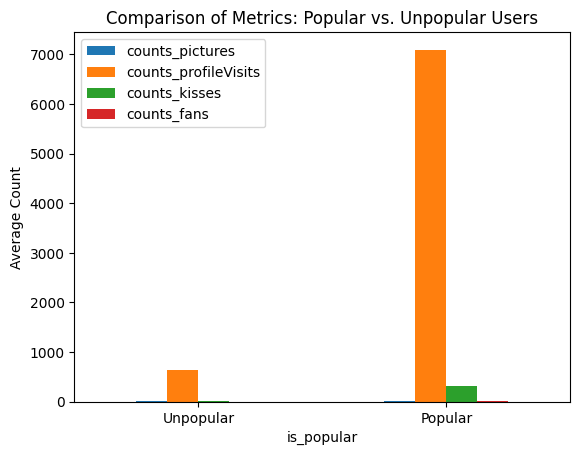

In [ ]:
# Compare popular and unpopular users
comparison = users_instances.groupby('is_popular')[['counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()

# Plot
comparison.plot(kind='bar')
plt.title('Comparison of Metrics: Popular vs. Unpopular Users')
plt.ylabel('Average Count')
plt.xticks([0, 1], ['Unpopular', 'Popular'], rotation=0)
plt.show()

> **Popularity by Age**


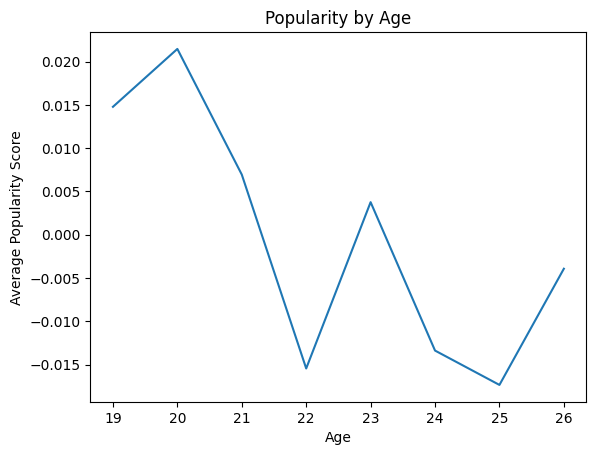

In [ ]:
age_popularity = users_instances.groupby('age')['popularity_score'].mean()

plt.plot(age_popularity.index, age_popularity.values)
plt.xlabel('Age')
plt.ylabel('Average Popularity Score')
plt.title('Popularity by Age')
plt.show()

> **Patterns Across Popular Users**


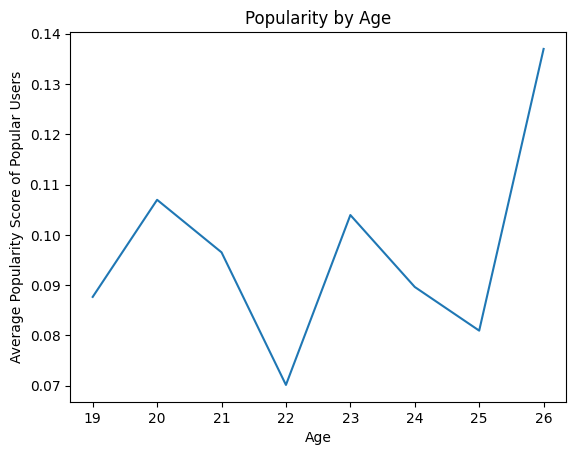

In [ ]:
age_popularity_of_popular_users = popular_users.groupby('age')['popularity_score'].mean()

plt.plot(age_popularity_of_popular_users.index, age_popularity_of_popular_users.values)
plt.xlabel('Age')
plt.ylabel('Average Popularity Score of Popular Users')
plt.title('Popularity by Age')
plt.show()

Popularity appears to be driven by higher visibility, active engagement (e.g., having fans), and potentially age-related appeal, where slightly older users are more likely to achieve or sustain popularity among popular users while 20 age users seems on average shows more popularity. These factors suggest that a combination of user traits and external interaction patterns determines popularity.